# 개별 미션

In [70]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv('24_Data.csv')

1. 기업 평가를 남긴 사원들의 직무 별 기업추천/비추천 비율을 계산하시오.

In [6]:
df_cross = pd.crosstab(df1['직무'],df1['기업추천여부'], margins=True)

In [10]:
df_cross['비추천비율'] = df_cross['비추천']/df_cross['All']
df_cross['추천비율'] = df_cross['추천']/df_cross['All']

In [11]:
df_cross

기업추천여부,비추천,추천,All,비추천비율,추천비율
직무,,,,,
개발,0,4,4,0.000000,1.000000
교육,0,1,1,0.000000,1.000000
금융/재무,8,23,31,0.258065,0.741935
기획/경영,3,11,14,0.214286,0.785714
데이터,0,1,1,0.000000,1.000000
마케팅/시장조사,0,1,1,0.000000,1.000000
미디어/홍보,1,6,7,0.142857,0.857143
법률/법무,1,3,4,0.250000,0.750000
서비스/고객지원,1,5,6,0.166667,0.833333


2. 실제로 직무에 따른 기업 추천/비추천의 연관성이 있는지 가설검정

In [12]:
#귀무가설: 직무와 기업 추천여부는 서로 독립이다
#대립가설: 직무와 기업 추천여부는 서로 연관성이 있다
import scipy.stats as stats

In [14]:
stats.chi2_contingency(df_cross[['추천','비추천']])[1]
# P.value > 0.05 / 귀무가설 참
# 직무와 기업 추천여부는 서로 독립이다

0.8648381977020227

3. 기업을 추천하는 사원들의 데이터만 뽑아, 해당 인원들이 작성한 기업장점 데이터를 워드 클라우드로 시각화 하시오.

In [15]:
import konlpy
import pandas as pd
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
okt = Okt()

In [17]:
cond1 = (df1['기업추천여부']=='추천')
df1_recommend = df1.loc[cond1]
df1_recommend.head(2)

,Unnamed: 0,직무,재직상태,근무지,작성년도,작성월,기업한줄평,기업장점,기업단점,경영진희망사항,기업추천여부,추천수
0,0,기획/경영,전직원,서울,2024,3,"""부서 by 부서, 팀장 by 팀장으로 근무환경이 달라지는 곳""","사람 by 사람이 심하겠지만, 배울 점이 많은 분들 밑에서 일했습니다. 휴게실, 점...","사람 by 사람이 심한만큼, 배울 점이 많은 분들만 있는 것은 아니었습니다. 업무량...",일하는만큼 상응하는 연봉을 받고 싶습니다.,추천,0
1,1,특수계층/공공,전직원,서울,2024,2,"""과거에 비해 안좋아졌지만 그래도 괜찮은 회사""",인력 구성이 훌륭하고 사회에 이바지할 수 있다.,공공기관 특성상 상방의 한계가 뚜렷하고 급여나 복지나 부족하다.,우수 인력의 이탈을 막기 위해서는 특단의 조치가 필요,추천,0


In [21]:
df_pos = pd.DataFrame()
for i in range(0, df1_recommend.shape[0]):
    df_n = pd.DataFrame(okt.pos(df1_recommend['기업장점'].values.tolist()[i]))
    df_pos = pd.concat([df_pos, df_n])

In [22]:
cond1 = (df_pos[1]=='Noun')
df_N = df_pos.loc[cond1]

In [23]:
from wordcloud import WordCloud

In [24]:
wc = WordCloud(background_color='white',
              width=800, height=600,
               font_path='Malgun.ttf').generate(' '.join(df_N[0]))

In [25]:
import matplotlib.pyplot as plt

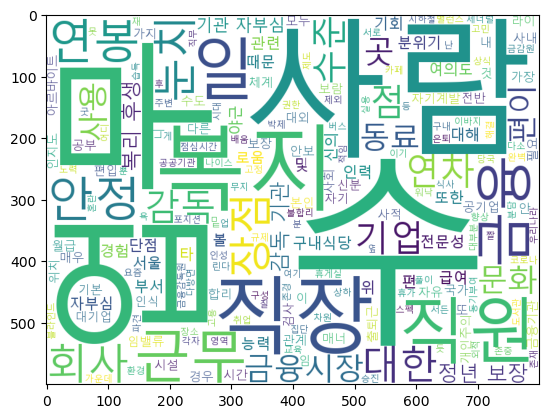

In [26]:
plt.imshow(wc)

5. 추천수를 가장 많이 받은 상위 10개의 데이터를 뽑아, 현직자와 아닌 사원들의 수를 확인하시오.

In [28]:
df_highly_reco = df1.sort_values(by='추천수', ascending=False).head(10)

In [29]:
df_highly_reco['재직상태'].value_counts()

재직상태
현직원    6
전직원    4
Name: count, dtype: int64

----

- 외부 데이터 크롤링

7. 네이버에 '하나은행'과 관련된 뉴스 기사를 검색하여, 상위 10개의 뉴스 기사의 제목과 내용을 수집해, 워드클라우드로 시각화 하시오 (제목,내용 구분없이 한번에 시각화)

In [30]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 28.6 MB/s eta 0:00:0000:0100:01


In [31]:
import pyautogui
import pyperclip
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

In [131]:
#네이버에 접속
driver = webdriver.Chrome()
driver.get('https://www.naver.com/')

In [132]:
#특정 이미지를 찾아 해당 이미지의 좌표를 확인
point1 = pyautogui.locateOnScreen('searchbar.png',
                                    confidence = 0.9)

time.sleep(2)

# 해당 이미지 좌표의 센터 좌표값이 도출
site = pyautogui.center(point1)

# 계산된 중심값으로 마우스 커서를 이동
pyautogui.moveTo(site)
time.sleep(2)

# 검색창 클릭
pyautogui.click()
time.sleep(1)

#'하나은행 검색어를 검색창에 입력'
pyperclip.copy('하나은행')
pyautogui.hotkey('command','v')
time.sleep(1)

pyautogui.write(['enter'])

In [129]:
# 뉴스 탭에 해당하는 버튼을 클릭
new_tag = driver.find_element(By.XPATH,
                   '//*[@id="lnb"]/div[1]/div/div[1]/div/div[1]/div[8]/a')
new_tag.click()

In [58]:
# 현재 띄워진 화면에 HTML 정보 추출
html = BeautifulSoup(driver.page_source)

In [64]:
# 뉴스 기사 제목
news_tit = html.find_all('a', class_ = 'news_tit')
news_tit_list = [x.get_text() for x in news_tit]

In [65]:
# 뉴스 기사 내용
context = html.find_all('a',
                        class_ = 'api_txt_lines dsc_txt_wrap')
context_list = [x.get_text() for x in context]

In [67]:
# 첫 화면에 띄워진 10개만 수집된 상태
pd.DataFrame(data={'제목':news_tit_list, '내용':context_list})

,제목,내용
0,"하나은행, '2024 대전하나시티즌' 홈경기 예매 서비스 오픈",하나은행은 모바일 앱인 '하나원큐'를 통해 프로축구단 '대전하나시티즌'의 2024 ...
1,"독일 하나은행, 무디스 국제신용등급 'Aa3' 획득",하나은행은 독일 현지법인 '독일 하나은행'이 글로벌 3대 신용평가사 중 하나인 무디...
2,'영웅시대' 화력에 하나은행 웃는다,주요 팬층인 중·장년층 여성들의 튼튼한 수요를 등에 업고 하나은행이 펼치고 있는 활...
3,"하나은행 자회사 GLN인터내셔널, 정보보안·개인정보보호 국제표준 획득","하나은행 자회사 GLN인터내셔널, 정보보안·개인정보보호 국제표준 획득 하나은행의 글..."
4,"하나은행, 2024 대전하나시티즌 홈경기 예매 서비스 오픈",하나은행이 대표 모바일 앱(app)인 '하나원큐'를 통해 K1리그1 프로축구단 '대...
5,"獨 하나은행, 무디스 국제신용등급 'Aa3' 획득",100% 자회사…유럽 진출 '한국계 은행' 최초 아주경제=김수지 기자 sujiq@a...
6,"‘히어로의 저력’, 임영웅 하나은행 유튜브 800만 돌파",8일 오전 임영웅과 함께한 하나은행 15초 광고가 유튜브 조회수 800만을 돌파했다...
7,"독일 하나은행, 무디스 국제신용등급 ‘Aa3’ 획득",하나은행은 독일 현지법인 독일 하나은행이 글로벌 3대 신용평가사 중 하나인 무디스로...
8,"[게시판] 무보-하나은행, 해외 미수채권 회수 지원 협약",▲ 한국무역보험공사와 하나은행은 4일 '중소·중견기업 해외 미수채권 회수 지원을 위...
9,"하나은행, 무역보험공사와 '해외 미수채권 회수지원' 협력",하나은행이 중소·중견기업의 해외시장 수출 안전망을 강화하기 위해 한국무역보험공사와 ...


In [90]:
# 스크롤을 계속 내려, 페이지에 더 많은 데이터를 요청
driver.execute_script('window.scrollTo(0, 10000);')

In [82]:
# 반복적으로 해당 페이지의 스크롤을 이동
for i in range(30):
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight):')
    time.sleep(np.random.radint(0,2)+0.3)

JavascriptException: Message: javascript error: Unexpected token ':'
  (Session info: chrome=122.0.6261.112)
Stacktrace:
0   chromedriver                        0x0000000102884508 chromedriver + 3966216
1   chromedriver                        0x000000010287ca94 chromedriver + 3934868
2   chromedriver                        0x00000001024ffda0 chromedriver + 277920
3   chromedriver                        0x0000000102504648 chromedriver + 296520
4   chromedriver                        0x0000000102506274 chromedriver + 303732
5   chromedriver                        0x000000010257b62c chromedriver + 783916
6   chromedriver                        0x000000010257abf0 chromedriver + 781296
7   chromedriver                        0x0000000102536fb0 chromedriver + 503728
8   chromedriver                        0x0000000102537a28 chromedriver + 506408
9   chromedriver                        0x00000001028496f0 chromedriver + 3725040
10  chromedriver                        0x000000010284dbe4 chromedriver + 3742692
11  chromedriver                        0x00000001028321d8 chromedriver + 3629528
12  chromedriver                        0x000000010284e6e0 chromedriver + 3745504
13  chromedriver                        0x0000000102825550 chromedriver + 3577168
14  chromedriver                        0x000000010286cf40 chromedriver + 3870528
15  chromedriver                        0x000000010286d0e4 chromedriver + 3870948
16  chromedriver                        0x000000010287c704 chromedriver + 3933956
17  libsystem_pthread.dylib             0x0000000197063fa8 _pthread_start + 148
18  libsystem_pthread.dylib             0x000000019705eda0 thread_start + 8


In [92]:
html = BeautifulSoup(driver.page_source)
news_tit = html.find_all('a', class_ = 'news_tit')
news_tit_list = [x.get_text() for x in news_tit]
context = html.find_all('a',
                        class_ = 'api_txt_lines dsc_txt_wrap')
context_list = [x.get_text() for x in context]

In [94]:
df1 = pd.DataFrame(data={'제목':news_tit_list, '내용':context_list})

In [141]:
len(news_tit_list)

290

In [142]:
len(context_list)

290

In [95]:
df2 = df1.melt()

In [98]:
df_pos = pd.DataFrame()
for i in range(0, df2.shape[1]):
    df_n = pd.DataFrame(okt.pos(df2['value'].values.tolist()[i]))
    df_pos = pd.concat([df_pos, df_n])
    
cond1 = (df_pos[1]=='Noun')
df_N = df_pos.loc[cond1]

In [99]:
wc = WordCloud(background_color='white',
             width=800, height=600,
             font_path='Malgun.ttf').generate(' '.join(df_N[0]))

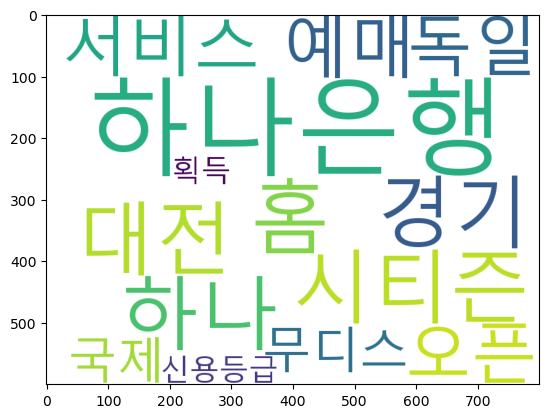

In [100]:
plt.imshow(wc)

----

8. 네이버 금융에서 금일 급상승한 주식 종목을 찾고, 블로그에 자동 포스팅하는 프로그램을 만드시오.
(코드를 한번 실행하면, 데이터 수집 및 자동 포스팅이 모두 한번에 이뤄져야함)

In [101]:
import requests

In [106]:
# 네이버 금융 페이지 (상승 종목 확인)
url_get = requests.get('https://finance.naver.com/sise/sise_rise.naver')
df3 = pd.read_html(url_get.text)[1]

In [111]:
stock_rise_text = str(df3[~(df3['종목명'].isna())].head(5)[['종목명','현재가','등락률']])

In [112]:
print(stock_rise_text)

                           종목명      현재가      등락률
1                        플레이그램    635.0  +16.73%
2                           국보   2610.0  +16.52%
3                         테이팩스  26200.0  +14.41%
4  KB 블룸버그 인버스2X 천연가스선물 ETN(H)  89840.0  +14.27%
5    한투 블룸버그 인버스 2X 천연가스선물 ETN  83435.0  +14.26%


In [118]:
# 제목에 해당하는 칸을 클릭
# 이미지와 동일한 부분을 찾아 좌표로 변환
p1 = pyautogui.locateOnScreen('blog1.png',
                        confidence=0.95)

# 해당 좌표의 중심값 계산
center1 = pyautogui.center(p1)

# 계산된 중심값으로 마우스 커서를 이동
pyautogui.moveTo(center1)
time.sleep(1)
pyautogui.click()

In [120]:
import datetime
# 오늘 날짜 값 추출
today = datetime.datetime.now()
str(today.date())

'2024-03-08'

In [121]:
title_text = '[금융스테이션] 금일 급상승 종목' + str(today.date())
title_text

'[금융스테이션] 금일 급상승 종목2024-03-08'

In [122]:
pyperclip(title_text) # 앞서 선언된 텍스트를 복사
pyautogui.hotkey('command','v')

TypeError: 'module' object is not callable

In [123]:
context_text = '''
안녕하세요
데이터 스테이션입니다.
금일 급상승 코스피 종목을 소개해드리겠습니다.
'''+stock_rise_text

In [124]:
print(context_text)


안녕하세요
데이터 스테이션입니다.
금일 급상승 코스피 종목을 소개해드리겠습니다.
                           종목명      현재가      등락률
1                        플레이그램    635.0  +16.73%
2                           국보   2610.0  +16.52%
3                         테이팩스  26200.0  +14.41%
4  KB 블룸버그 인버스2X 천연가스선물 ETN(H)  89840.0  +14.27%
5    한투 블룸버그 인버스 2X 천연가스선물 ETN  83435.0  +14.26%


# 기타 셀레니움 함수

**Headless** 활용 데이터 자동 수집
- 브라우저 화면을 띄우지 않고 메모리상에서만 올려 크롤링을 수행

In [134]:
option = webdriver.ChromeOptions()
option.add_argument('headless')

In [135]:
driver = webdriver.Chrome(options=option)
driver.get('https://finance.naver.com/sise/sise_rise.naver')

In [136]:
driver.quit()

In [137]:
# 웹 브라우저 자체적으로 띄워주는 안내메시지 창
driver = webdriver.Chrome()
driver.get('https://finance.naver.com/sise/sise_rise.naver')

In [138]:
driver.execute_script('alert("selenium test"):')

JavascriptException: Message: javascript error: Unexpected token ':'
  (Session info: chrome=122.0.6261.112)
Stacktrace:
0   chromedriver                        0x0000000104e40508 chromedriver + 3966216
1   chromedriver                        0x0000000104e38a94 chromedriver + 3934868
2   chromedriver                        0x0000000104abbda0 chromedriver + 277920
3   chromedriver                        0x0000000104ac0648 chromedriver + 296520
4   chromedriver                        0x0000000104ac2274 chromedriver + 303732
5   chromedriver                        0x0000000104b3762c chromedriver + 783916
6   chromedriver                        0x0000000104b36bf0 chromedriver + 781296
7   chromedriver                        0x0000000104af2fb0 chromedriver + 503728
8   chromedriver                        0x0000000104af3a28 chromedriver + 506408
9   chromedriver                        0x0000000104e056f0 chromedriver + 3725040
10  chromedriver                        0x0000000104e09be4 chromedriver + 3742692
11  chromedriver                        0x0000000104dee1d8 chromedriver + 3629528
12  chromedriver                        0x0000000104e0a6e0 chromedriver + 3745504
13  chromedriver                        0x0000000104de1550 chromedriver + 3577168
14  chromedriver                        0x0000000104e28f40 chromedriver + 3870528
15  chromedriver                        0x0000000104e290e4 chromedriver + 3870948
16  chromedriver                        0x0000000104e38704 chromedriver + 3933956
17  libsystem_pthread.dylib             0x0000000197063fa8 _pthread_start + 148
18  libsystem_pthread.dylib             0x000000019705eda0 thread_start + 8


In [139]:
# 웹 브라우저 자체적으로 띄우는 경고/알림 메시지를 제거
driver.switch_to.alert.accept()

NoAlertPresentException: Message: no such alert
  (Session info: chrome=122.0.6261.112)
Stacktrace:
0   chromedriver                        0x0000000104e40508 chromedriver + 3966216
1   chromedriver                        0x0000000104e38a94 chromedriver + 3934868
2   chromedriver                        0x0000000104abbbf4 chromedriver + 277492
3   chromedriver                        0x0000000104adaaa0 chromedriver + 404128
4   chromedriver                        0x0000000104ada928 chromedriver + 403752
5   chromedriver                        0x0000000104af2fb0 chromedriver + 503728
6   chromedriver                        0x0000000104af3a28 chromedriver + 506408
7   chromedriver                        0x0000000104e056f0 chromedriver + 3725040
8   chromedriver                        0x0000000104e09be4 chromedriver + 3742692
9   chromedriver                        0x0000000104dee1d8 chromedriver + 3629528
10  chromedriver                        0x0000000104e0a6e0 chromedriver + 3745504
11  chromedriver                        0x0000000104de1550 chromedriver + 3577168
12  chromedriver                        0x0000000104e28f40 chromedriver + 3870528
13  chromedriver                        0x0000000104e290e4 chromedriver + 3870948
14  chromedriver                        0x0000000104e38704 chromedriver + 3933956
15  libsystem_pthread.dylib             0x0000000197063fa8 _pthread_start + 148
16  libsystem_pthread.dylib             0x000000019705eda0 thread_start + 8
